In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load recruiter-provided CSV ---
data = pd.read_csv("/content/customer_support_dataset.csv")

texts = data['query_text'].astype(str).tolist()
labels = data['query_type'].tolist()

# --- Encode labels ---
le = LabelEncoder()
y = le.fit_transform(labels)
num_classes = len(le.classes_)

# One-hot encode labels for keras
y_onehot = np.eye(num_classes)[y]

# --- Split into train/validation ---
X_train_texts, X_val_texts, y_train, y_val = train_test_split(
    texts, y_onehot, test_size=0.2, stratify=y, random_state=42
)

# --- Tokenizer and sequences ---
MAX_VOCAB = 5000
MAX_LEN = 50

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_texts), maxlen=MAX_LEN, padding='post')
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val_texts), maxlen=MAX_LEN, padding='post')

# --- Synonym dictionary for augmentation ---
synonym_dict = {
    "return": ["send back", "refund"],
    "order": ["purchase", "request"],
    "coffee": ["espresso", "cappuccino"],
    "maker": ["machine", "device"],
    "shipping": ["delivery", "transport"],
    "billing": ["invoice", "charge"]
}

# --- Augmentation function with noise ---
def augment_text_noise(text, prob=0.3):
    words = text.split()
    new_words = []
    for w in words:
        r = random.random()
        if r < prob and w.lower() in synonym_dict:
            # replace with synonym
            new_words.append(random.choice(synonym_dict[w.lower()]))
        elif r < prob + 0.1:
            # randomly drop word
            continue
        elif r < prob + 0.15:
            # reverse word as minor noise
            new_words.append(w[::-1])
        else:
            new_words.append(w)
    return " ".join(new_words)

# --- Generate augmented training data ---
aug_texts = []
aug_labels = []

for text, label in zip(X_train_texts, y_train):
    # original
    aug_texts.append(text)
    aug_labels.append(label)
    # 2 augmented variants
    for _ in range(2):
        aug_texts.append(augment_text_noise(text))
        aug_labels.append(label)

X_train_aug_seq = pad_sequences(tokenizer.texts_to_sequences(aug_texts), maxlen=MAX_LEN, padding='post')
y_train_aug = np.array(aug_labels)

print(f"Original training samples: {len(X_train_texts)}")
print(f"Augmented training samples: {len(X_train_aug_seq)}")







Original training samples: 4000
Augmented training samples: 12000


Original training samples: 4000
Augmented training samples: 12000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7189 - loss: 1.7423 - val_accuracy: 1.0000 - val_loss: 0.3213
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.3901 - val_accuracy: 1.0000 - val_loss: 0.2517
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9912 - loss: 0.3166 - val_accuracy: 1.0000 - val_loss: 0.2248
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9918 - loss: 0.2829 - val_accuracy: 1.0000 - val_loss: 0.1992
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.2574 - val_accuracy: 1.0000 - val_loss: 0.1842
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9922 - loss: 0.2360 - val_accuracy: 1.0000 - val_loss: 0.1705
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9922 - loss: 0.2232 - val_accuracy: 1.0000 - val_loss: 0.1615
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9914 - loss: 0.2138 - val_accuracy: 1.

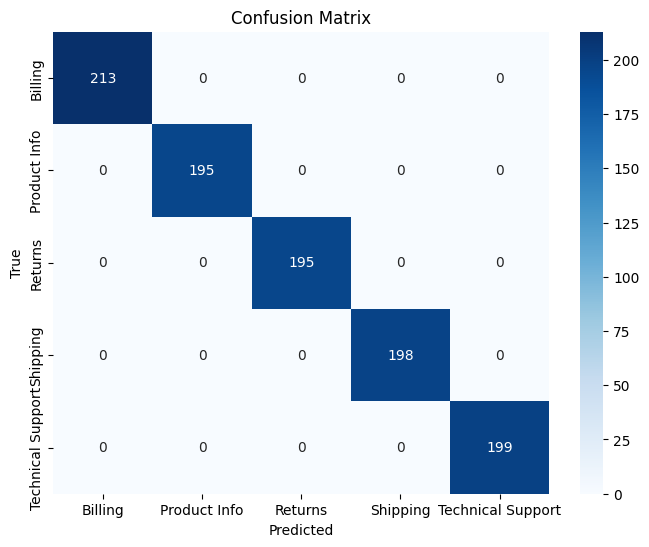

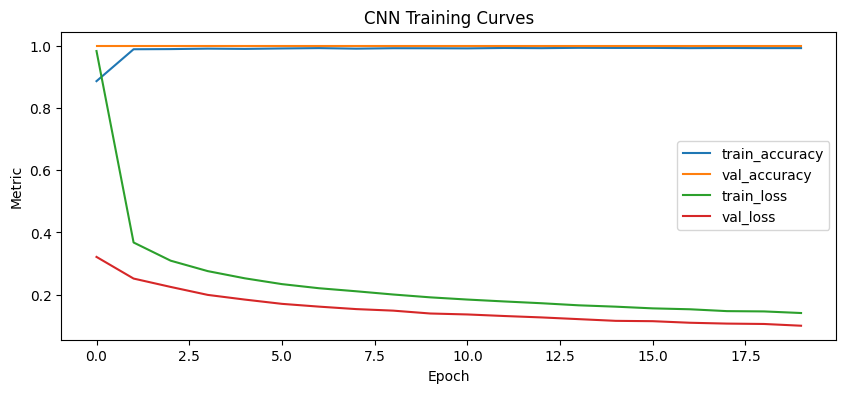

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3777 - loss: 2.2238 - val_accuracy: 0.4080 - val_loss: 1.2432
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3728 - loss: 1.2516 - val_accuracy: 0.3640 - val_loss: 1.2025
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3847 - loss: 1.1710 - val_accuracy: 0.3970 - val_loss: 1.0344
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3904 - loss: 1.1405 - val_accuracy: 0.4080 - val_loss: 1.0305
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3875 - loss: 1.1257 - val_accuracy: 0.2130 - val_loss: 1.6657
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2620 - loss: 1.5399 - val_accuracy: 0.3500 - val_loss: 1.2491
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3577 - loss: 1.2728 - val_accuracy: 0.3970 - val_loss: 1.0083
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3993 - loss: 1.0444 - val_accuracy: 0.411

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (32, 50, 100)          │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (32, 50, 128)          │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ (32, 128)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 5)                │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,877,489 (7.16 MB)

 Trainable params: 625,829 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,251,660 (4.77 MB)

=== LSTM Model Performance ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
                   precision    recall  f1-score   support

          Billing       1.00      1.00      1.00       213
     Product Info       1.00      1.00      1.00       195
          Returns       1.00      1.00      1.00       195
         Shipping       1.00      1.00      1.00       198
Technical Support       1.00      1.00      1.00       199

         accuracy                           1.00      1000
        macro avg       1.00      1.00      1.00      1000
     weighted avg       1.00      1.00      1.00      1000



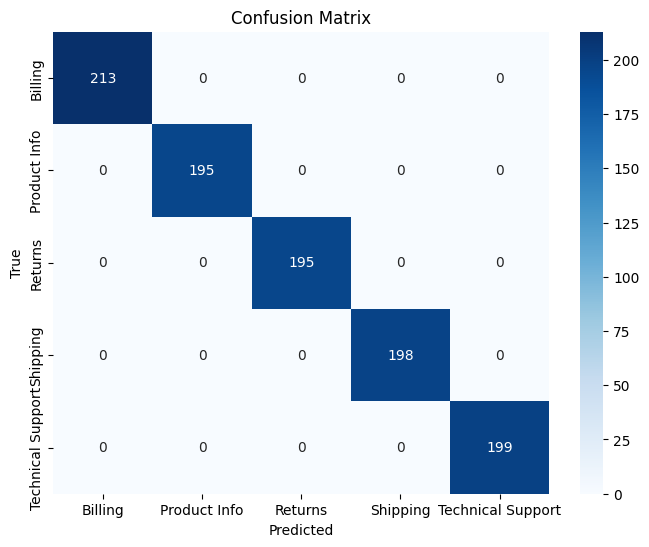

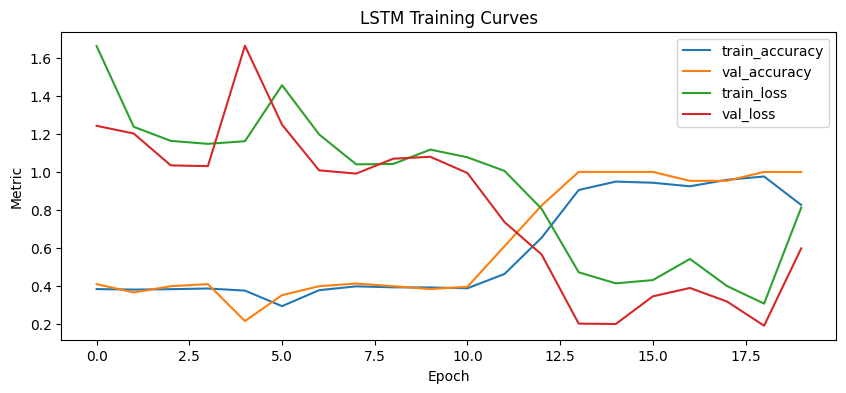

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load recruiter-provided CSV ---
data = pd.read_csv("/content/customer_support_dataset.csv")

texts = data['query_text'].astype(str).tolist()
labels = data['query_type'].tolist()

# --- Encode labels ---
le = LabelEncoder()
y = le.fit_transform(labels)
num_classes = len(le.classes_)

# One-hot encode labels for keras
y_onehot = np.eye(num_classes)[y]

# --- Split into train/validation ---
X_train_texts, X_val_texts, y_train, y_val = train_test_split(
    texts, y_onehot, test_size=0.2, stratify=y, random_state=42
)

# --- Tokenizer and sequences ---
MAX_VOCAB = 5000
MAX_LEN = 50

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_texts), maxlen=MAX_LEN, padding='post')
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val_texts), maxlen=MAX_LEN, padding='post')

# --- Synonym dictionary for augmentation ---
synonym_dict = {
    "return": ["send back", "refund"],
    "order": ["purchase", "request"],
    "coffee": ["espresso", "cappuccino"],
    "maker": ["machine", "device"],
    "shipping": ["delivery", "transport"],
    "billing": ["invoice", "charge"]
}

# --- Augmentation function with noise ---
def augment_text_noise(text, prob=0.3):
    words = text.split()
    new_words = []
    for w in words:
        r = random.random()
        if r < prob and w.lower() in synonym_dict:
            # replace with synonym
            new_words.append(random.choice(synonym_dict[w.lower()]))
        elif r < prob + 0.1:
            # randomly drop word
            continue
        elif r < prob + 0.15:
            # reverse word as minor noise
            new_words.append(w[::-1])
        else:
            new_words.append(w)
    return " ".join(new_words)

# --- Generate augmented training data ---
aug_texts = []
aug_labels = []

for text, label in zip(X_train_texts, y_train):
    # original
    aug_texts.append(text)
    aug_labels.append(label)
    # 2 augmented variants
    for _ in range(2):
        aug_texts.append(augment_text_noise(text))
        aug_labels.append(label)

X_train_aug_seq = pad_sequences(tokenizer.texts_to_sequences(aug_texts), maxlen=MAX_LEN, padding='post')
y_train_aug = np.array(aug_labels)

print(f"Original training samples: {len(X_train_texts)}")
print(f"Augmented training samples: {len(X_train_aug_seq)}")







import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# --- Hyperparameters ---
EMBEDDING_DIM = 100
NUM_CLASSES = y_train_aug.shape[1]
BATCH_SIZE = 32
EPOCHS = 20

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- CNN Model ---
cnn_model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=EMBEDDING_DIM, input_length=MAX_LEN, trainable=True),
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

# Train CNN
cnn_history = cnn_model.fit(
    X_train_aug_seq, y_train_aug,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop]
)

# --- Evaluate & Confusion Matrix ---
def evaluate_model(model, X_val_seq, y_val):
    y_pred = model.predict(X_val_seq)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

print("=== CNN Model Performance ===")
evaluate_model(cnn_model, X_val_seq, y_val)

# print("=== LSTM Model Performance ===")
# evaluate_model(lstm_model, X_val_seq, y_val)

# --- Plot training curves ---
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
    plt.show()

plot_history(cnn_history, 'CNN Training Curves')
# plot_history(lstm_history, 'LSTM Training Curves')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle imbalance
y_integers = np.argmax(y_train_aug, axis=1)  # Convert one-hot to integer labels
class_weights_array = compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)
class_weights = dict(enumerate(class_weights_array))



# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=EMBEDDING_DIM, input_length=MAX_LEN, trainable=True),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM with class weights
lstm_history = lstm_model.fit(
    X_train_aug_seq, y_train_aug,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights
)


# Show model summary after training
lstm_model.summary()


# aluate & Confusion Matrix ---
def evaluate_model(model, X_val_seq, y_val):
    y_pred = model.predict(X_val_seq)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# print("=== CNN Model Performance ===")
# evaluate_model(cnn_model, X_val_seq, y_val)

print("=== LSTM Model Performance ===")
evaluate_model(lstm_model, X_val_seq, y_val)

# --- Plot training curves ---
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
    plt.show()

# plot_history(cnn_history, 'CNN Training Curves')
plot_history(lstm_history, 'LSTM Training Curves')

In [ ]:
pip install gensim

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Use actual variable name from earlier preprocessing
X_train_aug = X_train_texts

# Combine all available text data
corpus_texts = list(X_train_aug) + list(X_val_texts)

# Tokenize sentences for Word2Vec
sentences = [text.split() for text in corpus_texts]

# Train your own small Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Build embedding matrix
embedding_matrix = np.zeros((MAX_VOCAB, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

# Create embedding layer from Word2Vec
embedding_layer = Embedding(
    input_dim=MAX_VOCAB,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=False  # keep False to test pretrained embeddings
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Use actual variable name from earlier preprocessing
X_train_aug = X_train_texts

# Combine all available text data
corpus_texts = list(X_train_aug) + list(X_val_texts)

# Tokenize sentences for Word2Vec
sentences = [text.split() for text in corpus_texts]

# Train your own small Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Build embedding matrix
embedding_matrix = np.zeros((MAX_VOCAB, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

# Create embedding layer from Word2Vec
embedding_layer = Embedding(
    input_dim=MAX_VOCAB,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=MAX_LEN,
    trainable=False  # keep False to test pretrained embeddings
)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8522 - loss: 1.6379 - val_accuracy: 0.9620 - val_loss: 0.5421
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9487 - loss: 0.4853 - val_accuracy: 1.0000 - val_loss: 0.2232
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9393 - loss: 0.4669 - val_accuracy: 1.0000 - val_loss: 0.2329
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9786 - loss: 0.2986 - val_accuracy: 1.0000 - val_loss: 0.1824
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9749 - loss: 0.2630 - val_accuracy: 1.0000 - val_loss: 0.1676
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9820 - loss: 0.2220 - val_accuracy: 1.0000 - val_loss: 0.1471
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9791 - loss: 0.2189 - val_accuracy: 1.0000 - val_loss: 0.1462
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9789 - loss: 0.2237 - val_acc

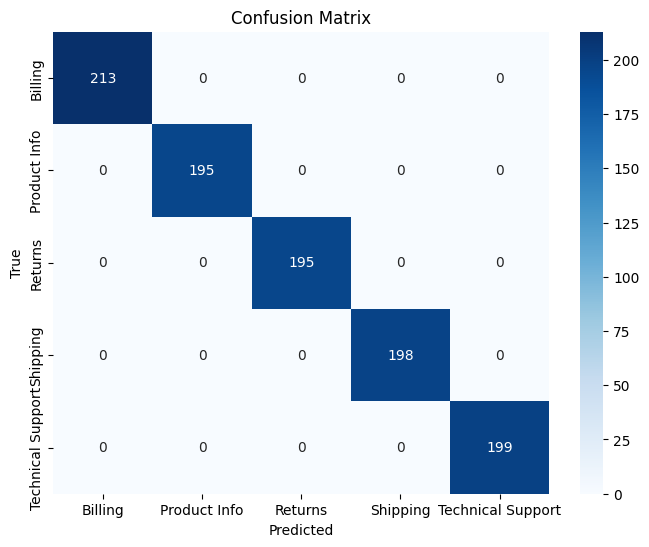

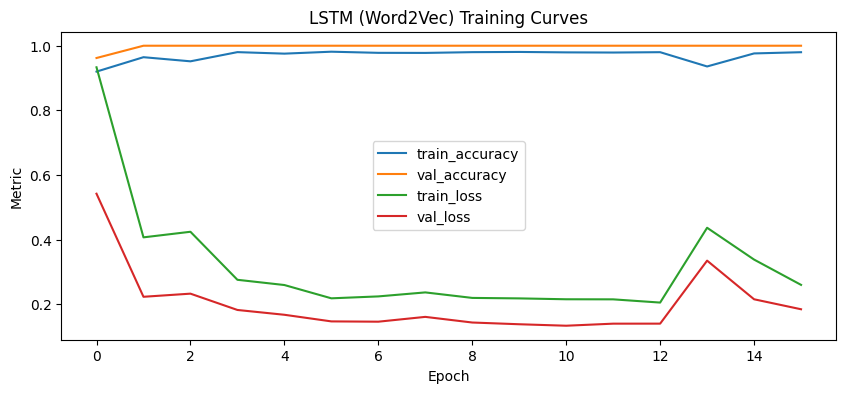

In [ ]:
# --- LSTM using Word2Vec Embeddings ---
lstm_w2v_model = Sequential([
    embedding_layer,  # frozen Word2Vec embeddings
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))
])

lstm_w2v_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_w2v_model.summary()

# Train
lstm_w2v_history = lstm_w2v_model.fit(
    X_train_aug_seq, y_train_aug,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    class_weight=class_weights
)

# Evaluate
print("=== LSTM (Word2Vec) Model Performance ===")
evaluate_model(lstm_w2v_model, X_val_seq, y_val)

# Plot training curves
plot_history(lstm_w2v_history, "LSTM (Word2Vec) Training Curves")


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (32, 50, 100)          │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_7          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8811 - loss: 1.6676 - val_accuracy: 1.0000 - val_loss: 0.3188
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9762 - loss: 0.3987 - val_accuracy: 1.0000 - val_loss: 0.2533
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9756 - loss: 0.3533 - val_accuracy: 1.0000 - val_loss: 0.2464
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9799 - loss: 0.3336 - val_accuracy: 1.0000 - val_loss: 0.2433
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9737 - loss: 0.3429 - val_accuracy: 1.0000 - val_loss: 0.2346
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9803 - loss: 0.3289 - val_accuracy: 1.0000 - val_loss: 0.2340
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9768 - loss: 0.3304 - val_accuracy: 1.0000 - val_loss: 0.2288
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9752 - loss: 0.3270 - val_accuracy:

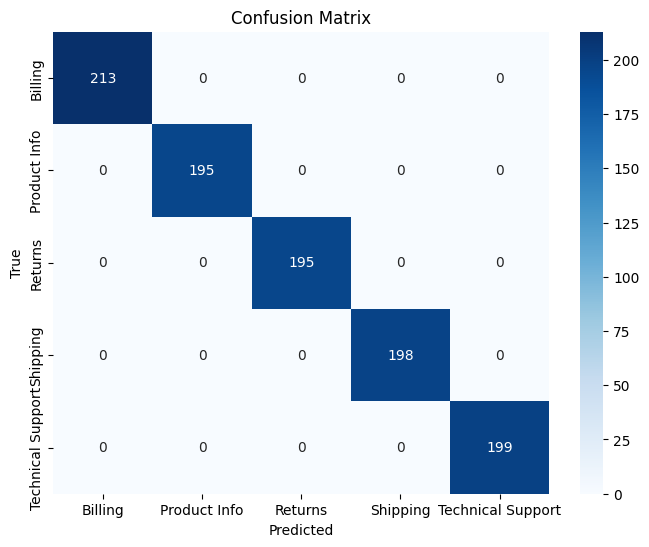

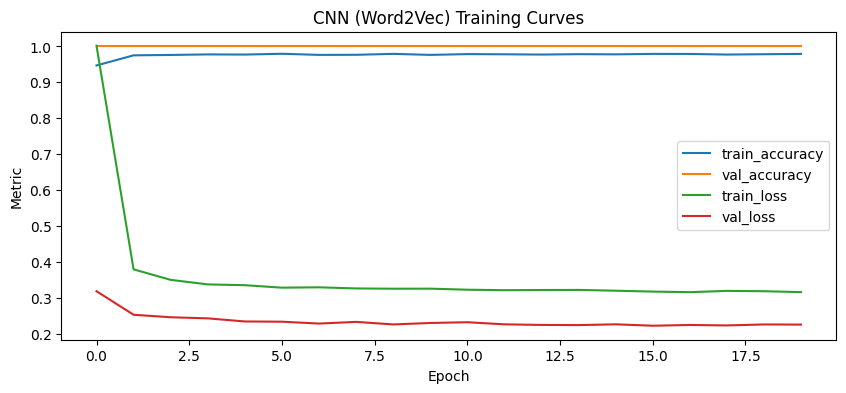

In [ ]:
# --- CNN using Word2Vec Embeddings ---
cnn_w2v_model = Sequential([
    embedding_layer,  # frozen Word2Vec embeddings
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(0.01))
])

cnn_w2v_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_w2v_model.summary()

# Train
cnn_w2v_history = cnn_w2v_model.fit(
    X_train_aug_seq, y_train_aug,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop]
)

# Evaluate
print("=== CNN (Word2Vec) Model Performance ===")
evaluate_model(cnn_w2v_model, X_val_seq, y_val)

# Plot training curves
plot_history(cnn_w2v_history, "CNN (Word2Vec) Training Curves")


In [ ]:
new_texts = [
    "I want to return the coffee maker I ordered, it doesn't work",
    "My package was supposed to arrive yesterday, but it didn't",
    "How do I reset my smartphone to factory settings?",
    "The tracking shows my order is stuck in South Ireland for 3 days"
]

# Convert new text to sequences
new_sequences = tokenizer.texts_to_sequences(new_texts)

# Pad sequences to the same MAX_LEN as training
new_sequences_padded = pad_sequences(new_sequences, maxlen=MAX_LEN, padding='post')

# Predict probabilities for each class
pred_probs = lstm_model.predict(new_sequences_padded)

# Get the predicted class index
pred_indices = np.argmax(pred_probs, axis=1)

# Decode to original labels
pred_labels = le.inverse_transform(pred_indices)

# Show results
for text, label in zip(new_texts, pred_labels):
    print(f"Query: {text}")
    print(f"Predicted query type: {label}\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Query: I want to return the coffee maker I ordered, it doesn't work
Predicted query type: Returns

Query: My package was supposed to arrive yesterday, but it didn't
Predicted query type: Shipping

Query: How do I reset my smartphone to factory settings?
Predicted query type: Technical Support

Query: The tracking shows my order is stuck in South Ireland for 3 days
Predicted query type: Shipping



In [ ]:
models = {
    "CNN (Random)": cnn_model,
    "LSTM (Random)": lstm_model,
    "CNN (Word2Vec)": cnn_w2v_model,
    "LSTM (Word2Vec)": lstm_w2v_model
}

results = {}
for name, model in models.items():
    val_loss, val_acc = model.evaluate(X_val_seq, y_val, verbose=0)
    results[name] = {"Validation Accuracy": val_acc, "Validation Loss": val_loss}

results_df = pd.DataFrame(results).T
print("\n=== Model Comparison ===")
display(results_df)



=== Model Comparison ===


,Validation Accuracy,Validation Loss
CNN (Random),1.0,0.100183
LSTM (Random),1.0,0.188494
CNN (Word2Vec),1.0,0.222785
LSTM (Word2Vec),1.0,0.133681
